In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

from helpers import *

In [2]:
# Load the data
x_train, x_test, y_train, train_ids, test_ids, headers = load_csv_data('dataset')
x_train.shape, x_test.shape, y_train.shape

c:\Users\charl\OneDrive - Ecole Polytechnique\EPFL\Machine Learning\Project1\template\helpers.py:41: RuntimeWarning: invalid value encountered in cast
  train_ids = x_train[:, 0].astype(dtype=int)
c:\Users\charl\OneDrive - Ecole Polytechnique\EPFL\Machine Learning\Project1\template\helpers.py:42: RuntimeWarning: invalid value encountered in cast
  test_ids = x_test[:, 0].astype(dtype=int)


((328136, 321), (109380, 321), (328135,))

In [3]:
# Normalize the data
def normalize(x):
    mean = np.nanmean(x, axis=0)
    std = np.nanstd(x, axis=0)
    return (x - mean) / std

x_train = normalize(x_train)
x_test = normalize(x_test)

C:\Users\charl\AppData\Local\Temp\ipykernel_24604\850260894.py:5: RuntimeWarning: invalid value encountered in divide
  return (x - mean) / std


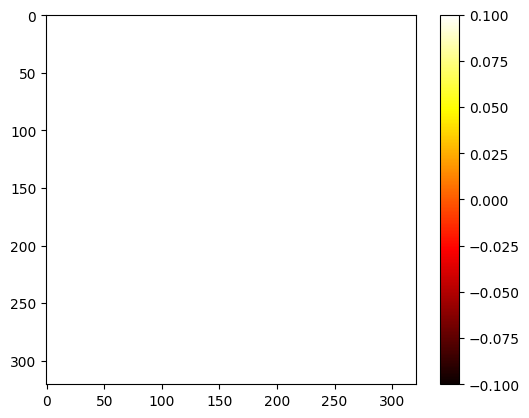

In [4]:
# As part of exploratory data analysis, we will look at the correlation between the features. We will build a correlation matrix and plot it.
correlation_matrix = np.corrcoef(x_train, rowvar=False)
plt.imshow(correlation_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

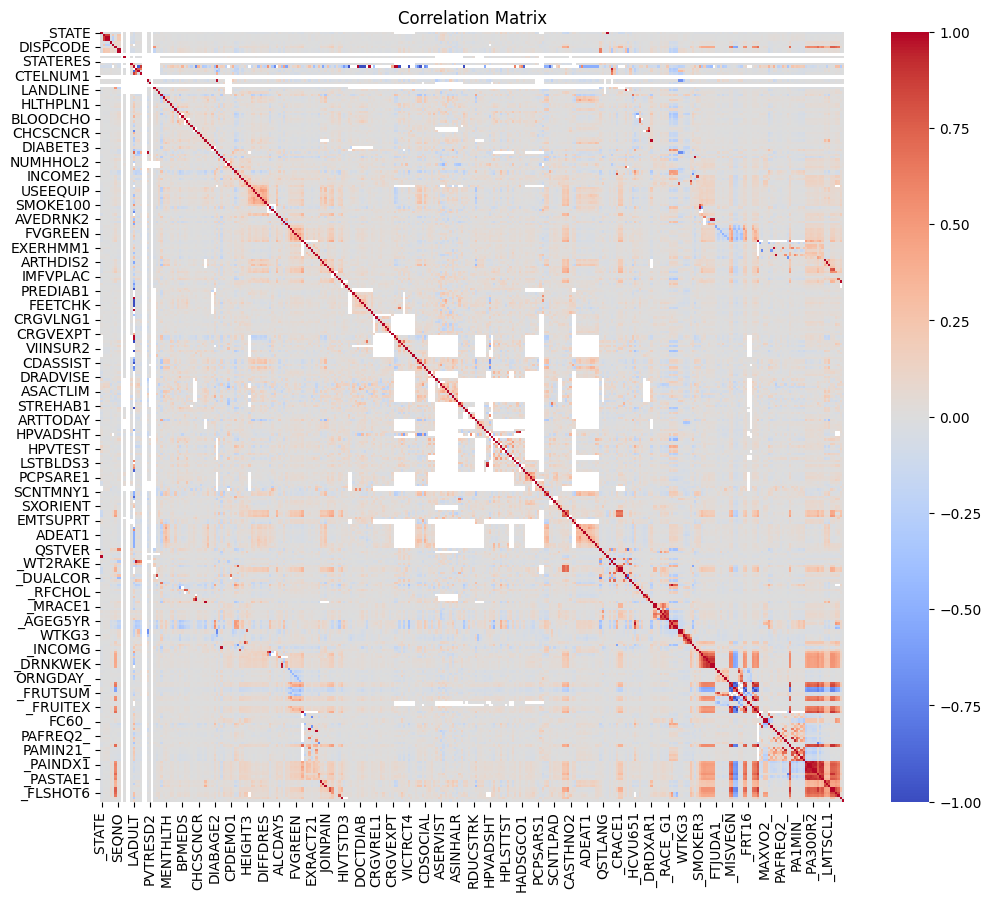

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# turn x and y into a pandas dataframe

df = pd.DataFrame(x_train[:-1], columns=headers)
# Add the target variable to the dataframe
df['y'] = y_train


# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix") 


In [ ]:
def plot_feature_availability_heatmap(x, headers):
    # Create a binary mask (1 = data, 0 = missing)
    mask = ~np.isnan(x)
    
    # Set up the figure
    plt.figure(figsize=(10, len(headers)*0.5))  # Adjust the height based on the number of features
    
    # Plot the heatmap using seaborn
    sns.heatmap(mask, cmap="RdYlGn", cbar=False, yticklabels=headers)
    
    plt.title("Feature Availability Heatmap")
    plt.xlabel("Samples")
    plt.ylabel("Features")
    plt.show()



# Also, we will look at the distribution of the features in the training data
plot_feature_availability_heatmap(x_train[:, :10], headers[:10])

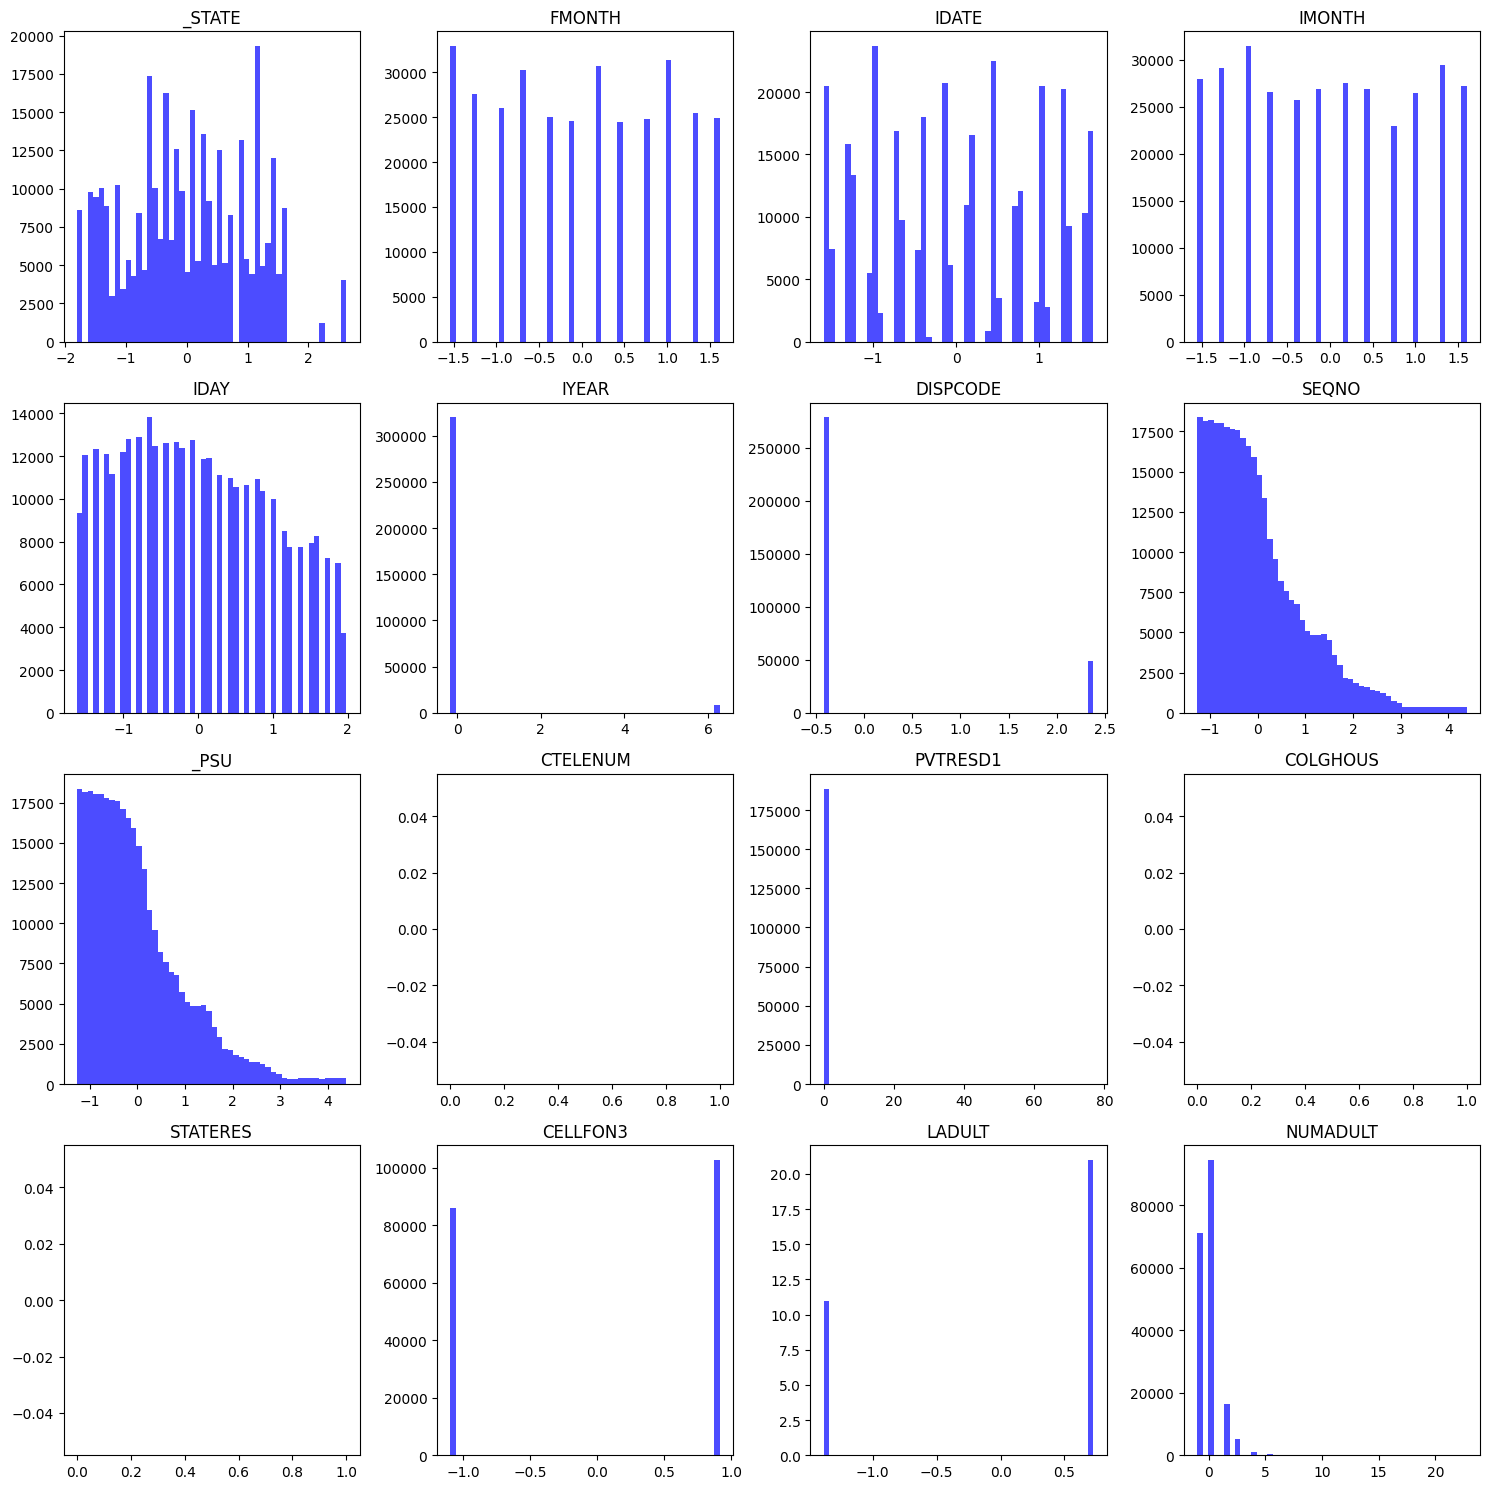

In [25]:
# For each feature, we will plot the distribution of the values in the training data under the form of a histogram.
def plot_feature_histograms(x, headers):
    # Set up the figure
    plt.figure(figsize=(15, 15))
    
    # For each feature
    for i in range(x.shape[1]):
        plt.subplot(4, 4, i+1)
        plt.hist(x[~np.isnan(x[:, i]), i], bins=50, color='b', alpha=0.7)
        plt.title(headers[i])
    
    plt.tight_layout()
    plt.show()

plot_feature_histograms(x_train[:, :16], headers[:16])

In [ ]:
# Instead of histogram, we can use one heatmap per feature to show the distribution of the values in the training data.
# The abscissa represents the value of the feature, and the color represents the number of samples with this value.

# for each feature, compute the frequency of each value
    
# I want to do the same but stacking the bars for each feature
# for each feature, compute the frequency of each value
plt.figure(figsize=(15, 5))
for i in range (4):
    feature_values, feature_counts = np.unique(x_train[~np.isnan(x_train[:, i]), i], return_counts=True)
    plt.subplot(4, 1, i+1)
    plt.bar(feature_values, feature_counts, color='b', alpha=0.2)
    plt.title(headers[i])
    plt.show()


KeyboardInterrupt: 

Text(170.72222222222223, 0.5, 'Samples')

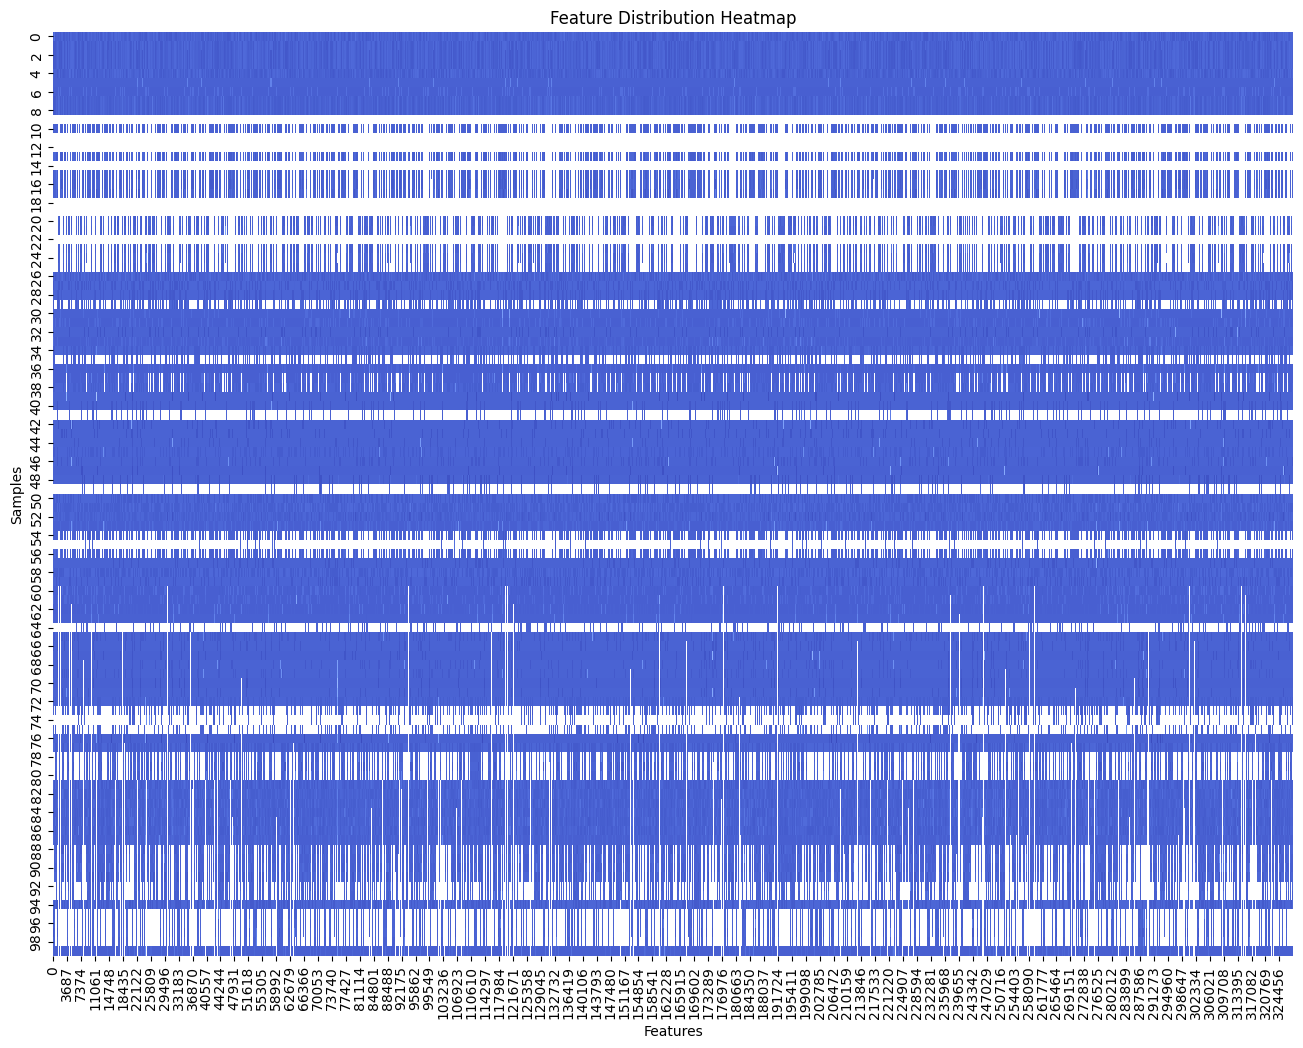

In [20]:
# Plot the distribution of the features in the form of a big heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(x_train[:, :100].T, cmap='coolwarm', cbar=False)
plt.title("Feature Distribution Heatmap")
plt.xlabel("Features")
plt.ylabel("Samples")

In [ ]:
# Now, we will construct a stack of heatmaps coloring the labels of the training data per feature
plot_feature_label_correlation(x_train, y_train, headers)

# We will also look at the distribution of the labels
plot_label_distribution(y_train)